In [10]:
import matplotlib.pyplot as plt
import json
import numpy as np
plt.rcParams.update({'font.size': 16})

In [11]:
datafile = '../data/magic_stickynote_connectivity.json'
guarantees = json.load(open(datafile))

In [12]:
guerantees3 = [guarantees[str((q,3))]['AR'] for q in range(1,12)]
guerantees4 = [guarantees[str((q,4))]['AR'] for q in range(1,5)]
guerantees5 = [guarantees[str((q,5))]['AR'] for q in range(1,4)]

In [24]:
def get_colors(num=2, offset=0.25, cmap=plt.cm.gnuplot2):
    """
    Returns:
        Array of len ``num``.
    """
    return np.array([cmap(x) for x in np.linspace(offset, 1-offset, num)])

In [35]:
from mpl_toolkits.axes_grid1 import Divider, Size
def add_sized_axis(fig, axsize):
    # The first items are for padding and the second items are for the axes.
    # sizes are in inch.
    h = [Size.Fixed(1.0), Size.Fixed(axsize[0]), Size.Fixed(.5)]
    v = [Size.Fixed(0.7), Size.Fixed(axsize[1])]

    divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
    # The width and height of the rectangle are ignored.

    ax = fig.add_axes(divider.get_position(),
                      axes_locator=divider.new_locator(nx=1, ny=1))

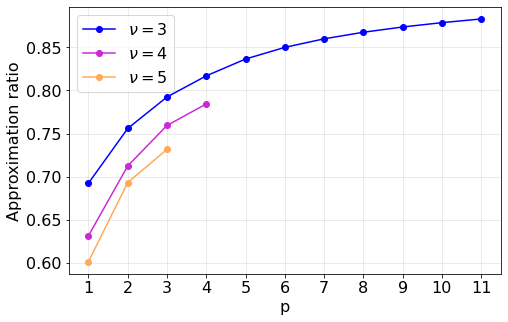

In [38]:
axsize = [6, 6/1.618]
fig = plt.figure(figsize=(axsize[0]+1.5, axsize[1]+.8))
add_sized_axis(fig, axsize)

#plt.subplots_adjust(left=0.15,right=0.85)
colors = get_colors(3)

plt.plot(np.arange(1,12), guerantees3, 'o-', label='$\\nu=3$', color=colors[0])
plt.plot(np.arange(1,5), guerantees4, 'o-', label='$\\nu=4$', color=colors[1])
plt.plot(np.arange(1,4), guerantees5, 'o-', label='$\\nu=5$', color=colors[2])

plt.gca().set_xticks(np.arange(1,12))
plt.xlabel('p')
plt.ylabel('Approximation ratio')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('./pdf/ap_vs_connectivity.pdf')